# Tabular challenge 2022

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize']=(20,20)

%matplotlib notebook

## Import data

In [2]:
df = pd.read_csv('data.csv')

## Data inspection

In [3]:
print(f'Number of rows: {len(df)}')

Number of rows: 98000


In [4]:
df.head(5)

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
0,0,-0.389420,-0.912791,0.648951,0.589045,-0.830817,0.733624,2.258560,2,13,...,-0.478412,-0.757002,-0.763635,-1.090369,1.142641,-0.884274,1.137896,1.309073,1.463002,0.813527
1,1,-0.689249,-0.453954,0.654175,0.995248,-1.653020,0.863810,-0.090651,2,3,...,-0.428791,-0.089908,-1.784204,-0.839474,0.459685,1.759412,-0.275422,-0.852168,0.562457,-2.680541
2,2,0.809079,0.324568,-1.170602,-0.624491,0.105448,0.783948,1.988301,5,11,...,-0.413534,-1.602377,1.190984,3.267116,-0.088322,-2.168635,-0.974989,1.335763,-1.110655,-3.630723
3,3,-0.500923,0.229049,0.264109,0.231520,0.415012,-1.221269,0.138850,6,2,...,0.619283,1.287801,0.532837,1.036631,-2.041828,1.440490,-1.900191,-0.630771,-0.050641,0.238333
4,4,-0.671268,-1.039533,-0.270155,-1.830264,-0.290108,-1.852809,0.781898,8,7,...,-1.628830,-0.434948,0.322505,0.284326,-2.438365,1.473930,-1.044684,1.602686,-0.405263,-1.987263


In [5]:
df.describe()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28
count,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,...,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000,98000.000000
mean,48999.500000,0.001220,0.005580,-0.001042,-0.000700,-0.003522,-0.001612,-0.003042,5.545918,6.763061,...,-0.004513,-0.000515,-0.001670,-0.038752,-0.220002,0.166434,-0.064309,-0.062540,0.098472,-0.230910
std,28290.307527,1.002801,1.000742,1.001373,1.000422,1.003061,1.000532,0.997434,3.691840,4.152348,...,1.004372,1.002962,0.999703,1.477858,1.494836,1.543014,1.576086,1.428055,1.305407,1.528476
min,0.000000,-4.732235,-4.202795,-4.377021,-4.010826,-4.535903,-4.300767,-4.894525,0.000000,0.000000,...,-4.894525,-4.732235,-4.438130,-6.873999,-8.234305,-7.792363,-6.593842,-7.375719,-7.335556,-6.954151
25%,24499.750000,-0.675226,-0.670985,-0.672779,-0.672540,-0.682510,-0.675066,-0.680421,3.000000,4.000000,...,-0.678773,-0.679777,-0.675147,-1.022964,-1.203204,-0.903385,-1.128966,-0.975680,-0.746489,-1.262606
50%,48999.500000,0.002022,0.006650,-0.000324,-0.003185,-0.003307,0.001024,-0.002053,5.000000,6.000000,...,-0.000587,-0.000806,0.000819,-0.056687,-0.219046,0.167074,-0.099221,-0.070852,0.082230,-0.271319
75%,73499.250000,0.677271,0.677746,0.677086,0.672097,0.677589,0.673344,0.668112,8.000000,9.000000,...,0.672149,0.675437,0.676881,0.930158,0.764690,1.217432,0.987684,0.843212,0.925306,0.770516
max,97999.000000,4.490521,4.324974,4.560247,4.399373,4.050549,4.710316,3.998595,32.000000,30.000000,...,4.560247,4.399373,4.135419,6.517721,6.054831,7.527271,7.544731,7.005608,7.205971,6.977150


### Add a new poissonian feature

<IPython.core.display.Javascript object>


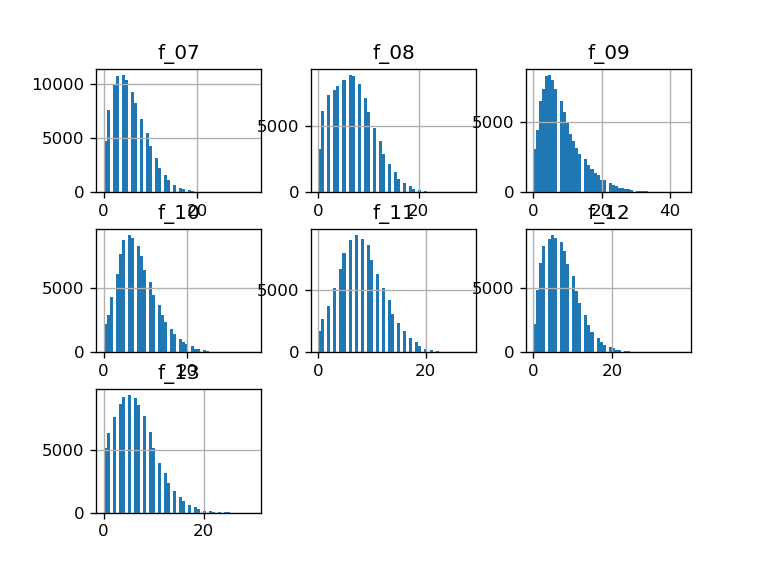

In [6]:
int_cols = ['f_07','f_08', 'f_09', 'f_10','f_11', 'f_12', 'f_13']

df[int_cols].hist(bins=50)
plt.show()

In [7]:
df['poisson'] = df[int_cols].sum(axis=1)

bins = np.arange(100)

gaussian_dist = np.random.normal(loc=50, scale=7, size=98000)
poisson_dist = np.random.poisson(lam=50, size=98000)

plt.hist([df['poisson'], gaussian_dist, poisson_dist], bins=bins, density=True, label=['data', 'gauss', 'poisson'])
plt.legend()
plt.show()

In [8]:
gaus_cols = ['f_22','f_23', 'f_24', 'f_25','f_26','f_27', 'f_28']

df['gauss'] = df[gaus_cols].sum(axis=1)

df['gauss'].hist(bins=50)

df['gauss'].describe()
print(df['gauss'].skew())
print(df['gauss'].kurt())

0.18611775782717352
0.3971342655470784


### Analyse correlations

<IPython.core.display.Javascript object>


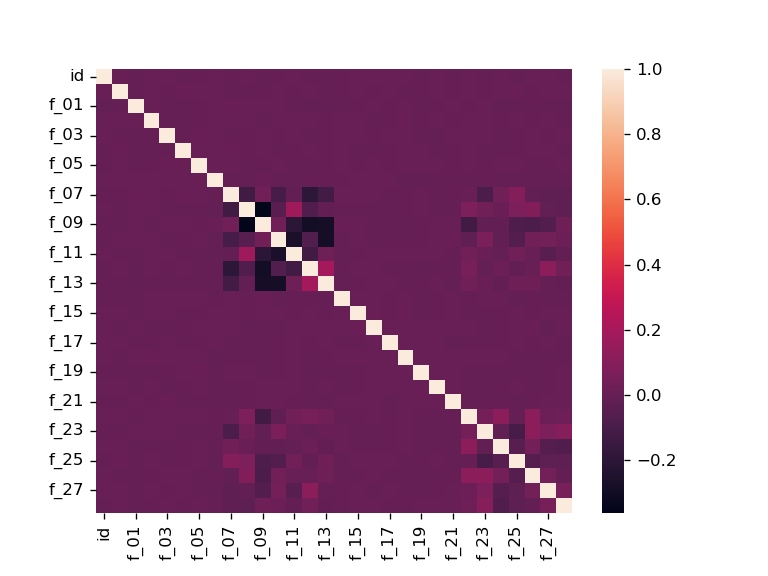

In [6]:
corr_matrix = df.corr()
ax = sns.heatmap(corr_matrix)

### Cluster map

In [ ]:
sns.clustermap(df.corr().abs(), linewidths=1)

### Pair plot

In [ ]:
temp_classification = pd.read_csv('reference_submission.csv', usecols=['Predicted'])
df['pred_cluster'] = temp_classification.values

useful_cols  = ['f_07','f_08', 'f_09', 'f_10','f_11', 'f_12', 'f_13', 'f_22','f_23', 'f_24', 'f_25','f_26','f_27', 'f_28', 'pred_cluster']

In [ ]:
pairplot = sns.pairplot(data=df[useful_cols], hue='pred_cluster', plot_kws={"s": 4})
fig = pairplot.fig
fig.savefig("pairplot.png", dpi=1200) 

## Pre-processing

### Data normalization
(note: pandas automatically applies operation as column-wise)

In [ ]:
def normalize_data(df, method='z-score'):
    numeric_df = df.select_dtypes(['number'])
    cols = numeric_df.columns
    if method == 'z-score':
        normalized_df = (numeric_df-numeric_df.mean())/numeric_df.std()
    elif method == 'min-max':
        normalized_df = (numeric_df-numeric_df.min())/(numeric_df.max()-numeric_df.min())
    else:
        print("No normalization")
        normalized_df = numeric_df
    df[cols] = normalized_df
    return df

In [ ]:
df = normalize_data(df)

### PCA

In [ ]:
pca = PCA(n_components=10)
pca.fit(df.select_dtypes(['number']))
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

### Create a naive baseline
- random classification/clustering
- all one class (zeros)

In [ ]:
def naive_baseline(num_classes, num_samples, mode='random'):
    if mode == 'random':
        return np.random.randint(low=0, high=num_classes, size=num_samples)
    if mode == 'zeros':
        return np.zeros(num_samples)

In [ ]:
predictions = naive_baseline(num_classes=7, num_samples=len(df))

## Categorical features

- if we sum all 7 integer columns, resulting amount is distributed as Poisson(50) for all clusters.
- the way the total is split across 7 variables varies by cluster
- for each cluster 7 variables appear to be correlated, so this not a simple Poisson splitting.
- most (but not all) correlations are negative, so this is not a multivariate Poisson mentioned above.
- yet we never get negative values, which i would expect if we mixed Poisson variables with negative coefficients.
- most individual variables by cluster exhibit overdispersion, there Var > Mean.


## Submission

In [ ]:
submission = pd.read_csv('sample_submission.csv')
submission['Predicted'] = predictions
submission.to_csv('submission.csv', index=False)
submission